# **Tame your python**

Let's see some classifiers in action

`Leggo`

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
def evaluate(y_test, y_pred):
  from sklearn.metrics import accuracy_score
  print("===== Accuracy Score =====")
  print(accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print("===== Accuracy Score =====")
  class_report = classification_report(y_test, y_pred)
  print(class_report)
  return

In [0]:
# Visualising the results
def plot_model(classifier, X_set, y_set, y_test, y_pred, text):
  from matplotlib.colors import ListedColormap
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('pink', 'cyan')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
  plt.title(text)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.show()

In [0]:
def preprocess(X_train, X_test):
  from sklearn.decomposition import PCA
  pca = PCA(n_components = 2)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  # Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test

## Get Breast Cancer Dataset

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [0]:
def draw_learning_curves(X, y, classifier):
  from sklearn.model_selection import learning_curve
  train_sizes, train_scores, test_scores = learning_curve(classifier, X, y)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()
  plt.title("Learning Curves")
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  plt.plot(train_scores_mean, 'o-', color="b", label="Training Score")
  plt.plot(test_scores_mean, 'o-', color="r", label="Cross Validation Score")
  plt.legend()
  plt.show()

In [77]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
X = data.data
y = data.target

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
def logistic_regression(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "Logistic Regression")
  draw_learning_curves(X_train, y_train, classifier)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


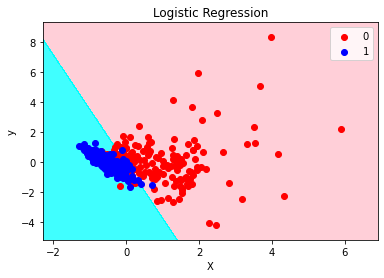

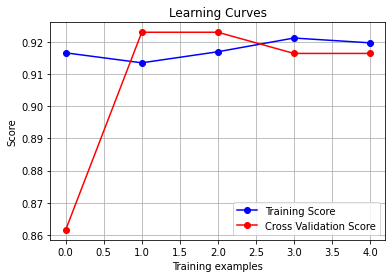

In [81]:
logistic_regression(X_train, X_test, y_train, y_test)

In [0]:
def ridge_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.linear_model import RidgeClassifierCV
  classifier = RidgeClassifierCV()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "RidgeClassifierCV")
  draw_learning_curves(X_train, y_train, classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


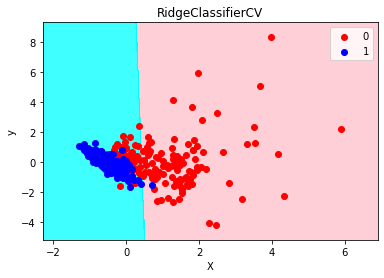

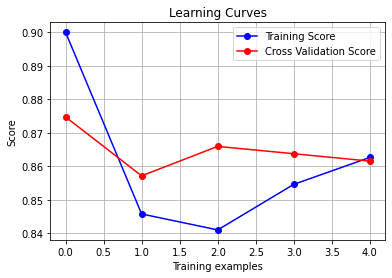

In [83]:
ridge_classification(X_train, X_test, y_train, y_test)

In [0]:
def svm_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.svm import SVC
  classifier = SVC()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "SVC")
  draw_learning_curves(X_train, y_train, classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


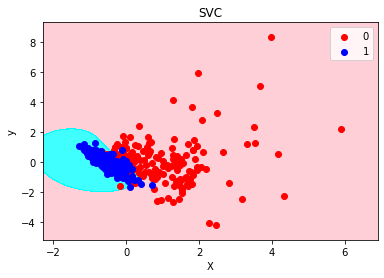

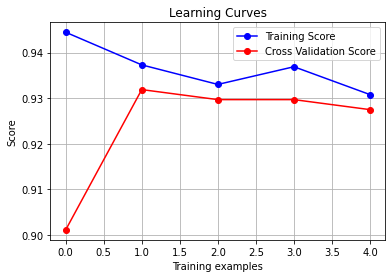

In [85]:
svm_classification(X_train, X_test, y_train, y_test)

In [0]:
def mlp_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.neural_network import MLPClassifier
  classifier = MLPClassifier()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "MLP")
  draw_learning_curves(X_train, y_train, classifier)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


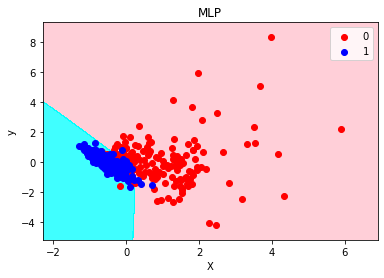

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


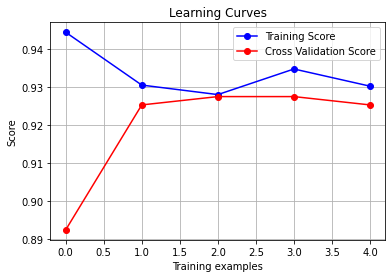

In [87]:
mlp_classification(X_train, X_test, y_train, y_test)

In [0]:
def linearsvm_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.svm import LinearSVC
  classifier = LinearSVC()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "LinearSVC")
  draw_learning_curves(X_train, y_train, classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


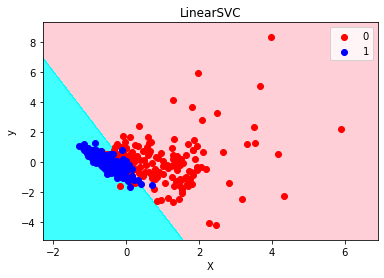

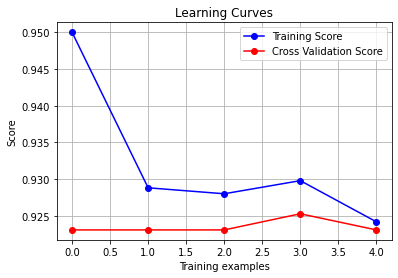

In [89]:
linearsvm_classification(X_train, X_test, y_train, y_test)

In [0]:
def rf_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.ensemble import RandomForestClassifier
  classifier = RandomForestClassifier()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "RandomForestClassifier")
  draw_learning_curves(X_train, y_train, classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


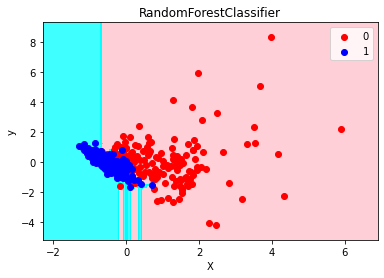

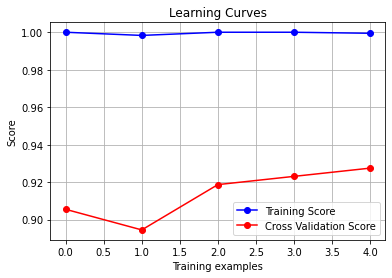

In [91]:
rf_classification(X_train, X_test, y_train, y_test)

In [0]:
def dt_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.tree import DecisionTreeClassifier
  classifier = DecisionTreeClassifier()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "DecisionTreeClassifier")
  draw_learning_curves(X_train, y_train, classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


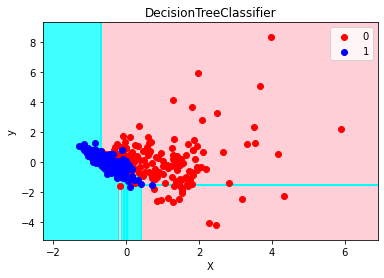

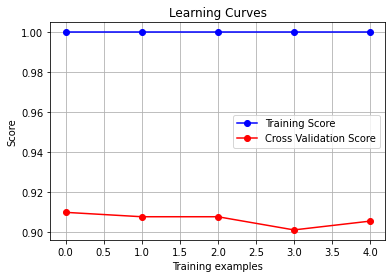

In [93]:
dt_classification(X_train, X_test, y_train, y_test)

In [0]:
def gb_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.ensemble import GradientBoostingClassifier
  classifier = GradientBoostingClassifier()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "GradientBoostingClassifier")
  draw_learning_curves(X_train, y_train, classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


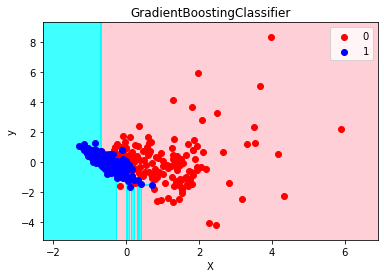

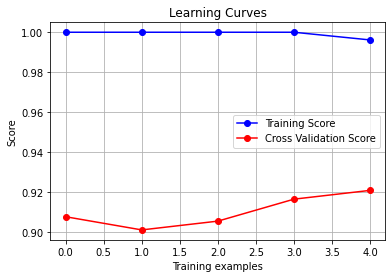

In [95]:
gb_classification(X_train, X_test, y_train, y_test)

In [0]:
def sgd_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.linear_model import SGDClassifier
  classifier = SGDClassifier()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "SGDClassifier")
  draw_learning_curves(X_train, y_train, classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


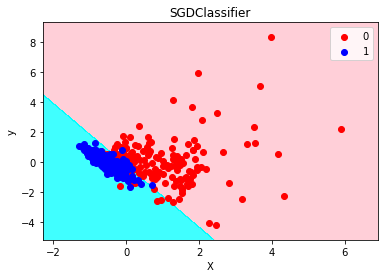

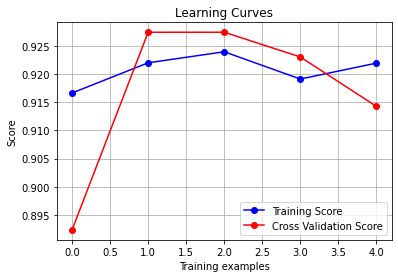

In [97]:
sgd_classification(X_train, X_test, y_train, y_test)

In [0]:
def perceptron_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.linear_model import Perceptron
  classifier = Perceptron()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "Perceptron")
  draw_learning_curves(X_train, y_train, classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


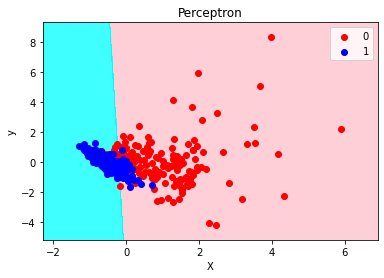

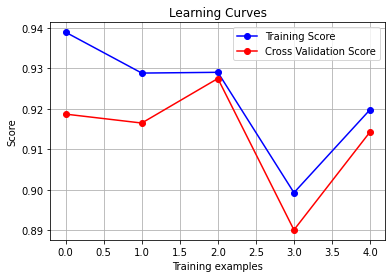

In [99]:
perceptron_classification(X_train, X_test, y_train, y_test)

In [0]:
def nb_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.naive_bayes import GaussianNB
  classifier = GaussianNB()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "GaussianNB")
  draw_learning_curves(X_train, y_train, classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


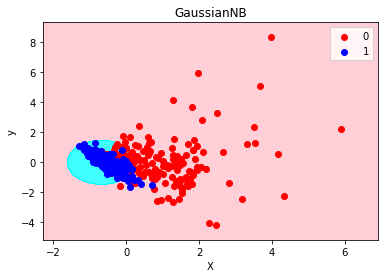

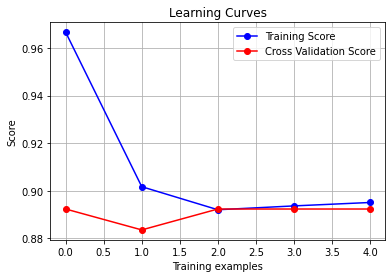

In [101]:
nb_classification(X_train, X_test, y_train, y_test)

In [0]:
def knn_classification(X_train, X_test, y_train, y_test):
  X_train, X_test = preprocess(X_train, X_test)
  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier()
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_pred = np.round(y_pred).flatten()
  plot_model(classifier, X_train, y_train, y_test, y_pred, "KNeighborsClassifier")
  draw_learning_curves(X_train, y_train, classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


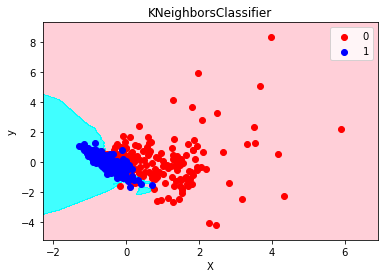

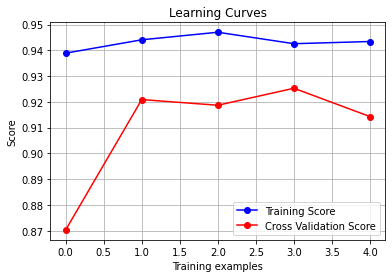

In [103]:
knn_classification(X_train, X_test, y_train, y_test)